In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
review_df=pd.read_csv(r'D:\Users\User\Downloads\archive (7)\AirlineReviews.csv')
review_df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


Data Collection

In [3]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [4]:
review_df.shape

(129455, 22)

In [5]:
print(f"there are {review_df.isna().sum().sum()} missing values.")
print(f"there are {review_df.duplicated().sum()} duplicated rows.")

there are 288234 missing values.
there are 0 duplicated rows.


In [6]:
objects_columns=review_df.select_dtypes(include='object')
objects_columns.head(5)

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,OriginCountry,Recommended,Review,Route,Slug,Title,TravelType,TripVerified,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,Netherlands,yes,Moroni to Moheli. Turned out to be a pretty de...,Moroni to Moheli,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,UnitedKingdom,no,Moroni to Anjouan. It is a very small airline....,Moroni to Anjouan,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,UnitedKingdom,no,Anjouan to Dzaoudzi. A very small airline and ...,Anjouan to Dzaoudzi,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,Denmark,yes,Havana - Cayo Coco return. A one hour flight w...,NaN,aerocaribbean,Aerocaribbean customer review,NaN,NaN,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,UnitedKingdom,no,Holguin to Havana last week. Okay apart from i...,NaN,aerocaribbean,Aerocaribbean customer review,NaN,NaN,d7bea425-c58a-4a7e-8269-02e0e6516633


In [7]:
verified_trips=review_df['TripVerified'].unique()
print(verified_trips)

['Trip Verified' nan 'Not Verified' 'Trip Verified,Trip Verified'
 'NotVerified' 'Not Verified,Not Verified'
 'Chicago to Colorado Springs. Not Verified']


In [8]:
unique_traveltype = review_df['TravelType'].unique()
print(unique_traveltype)

['Solo Leisure' nan 'Business' 'Couple Leisure' 'Family Leisure']


In [9]:
cabin_type=review_df['CabinType'].unique()
print(cabin_type)

['Economy Class' nan 'Business Class' 'First Class' 'Premium Economy']


In [10]:


review_df['Recommended'].nunique()

2

In [11]:
review_df['OriginCountry'].nunique()

202

In [12]:
review_df['AirlineName'].nunique()

547

DATA CLEANING 

In [13]:
#3.1 dATEPUB

In [14]:
review_df['MonthYearPublished']=pd.to_datetime(review_df['DatePub']).dt.to_period('M')

review_df['MonthYearPublished'] = review_df['MonthYearPublished'].dt.year.astype(str)+ review_df['MonthYearPublished'].dt.month.astype(str).str.zfill(2)

review_df['MonthYearPublished']=pd.to_numeric(review_df['MonthYearPublished'], errors='coerce')

print(review_df['MonthYearPublished'])

0         201911
1         201906
2         201906
3         201012
4         201011
           ...  
129450    201007
129451    201006
129452    201006
129453    201006
129454    201006
Name: MonthYearPublished, Length: 129455, dtype: int64


In [15]:
early_date=review_df['MonthYearPublished'].min()
latest_date=review_df['MonthYearPublished'].max()

In [16]:
print(f"The reviews range from {early_date} to {latest_date}.")

The reviews range from 200201 to 202305.


In [17]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [18]:
review_df=review_df.drop('DatePub',axis=1)
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   EntertainmentRating  129455 non-null  int64  
 5   FoodRating           129455 non-null  int64  
 6   GroundServiceRating  129455 non-null  int64  
 7   OriginCountry        127777 non-null  object 
 8   OverallScore         125124 non-null  float64
 9   Recommended          129455 non-null  object 
 10  Review               128631 non-null  object 
 11  Route                90825 non-null   object 
 12  SeatComfortRating    129455 non-null  int64  
 13  ServiceRating        129455 non-null  int64  
 14  Slug                 129455 non-null  object 
 15  Title            

In [19]:
review_df[['AirlineName','Slug']].sample(20)

,AirlineName,Slug
6734,Air Canada,air-canada
104314,Jet2.com,jet2-com
5959,Air Canada,air-canada
28736,Bangkok Airways,bangkok-airways
84344,Qantas Airways,qantas-airways
108165,Tigerair,tigerair
30981,British Airways,british-airways
71625,KLM Royal Dutch Airlines,klm-royal-dutch-airlines
55580,Frontier Airlines,frontier-airlines
9705,Air Serbia,air-serbia


In [20]:
review_df['AirlineName'].nunique()

547

In [21]:
review_df['Slug'].nunique()

548

In [22]:
review_df['converted']=review_df['AirlineName'].str.replace(' ','-').str.lower()

differ_values=review_df[review_df['converted'] != review_df['Slug']]

display(differ_values[['AirlineName','converted','Slug']])

,AirlineName,converted,Slug
8510,Air Cote d'Ivoire,air-cote-d'ivoire,air-cote-divoire
9095,Air North Yukon's Airline,air-north-yukon's-airline,air-north-yukons-airline
9096,Air North Yukon's Airline,air-north-yukon's-airline,air-north-yukons-airline
9097,Air North Yukon's Airline,air-north-yukon's-airline,air-north-yukons-airline
9641,Air Vanuatu,air-vanuatu,air-vanuata
...,...,...,...
121992,WestJet Airlines,westjet-airlines,westjet
121993,WestJet Airlines,westjet-airlines,westjet
121994,WestJet Airlines,westjet-airlines,westjet
121995,WestJet Airlines,westjet-airlines,westjet


In [23]:
review_df=review_df.drop(['Aircraft','Slug','converted'],axis=1)

In [24]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          129455 non-null  object 
 1   CabinType            126437 non-null  object 
 2   DateFlown            90993 non-null   object 
 3   EntertainmentRating  129455 non-null  int64  
 4   FoodRating           129455 non-null  int64  
 5   GroundServiceRating  129455 non-null  int64  
 6   OriginCountry        127777 non-null  object 
 7   OverallScore         125124 non-null  float64
 8   Recommended          129455 non-null  object 
 9   Review               128631 non-null  object 
 10  Route                90825 non-null   object 
 11  SeatComfortRating    129455 non-null  int64  
 12  ServiceRating        129455 non-null  int64  
 13  Title                129451 non-null  object 
 14  TravelType           91146 non-null   object 
 15  TripVerified     

In [25]:
review_df['unique_id'].nunique()

129455

In [26]:
review_df=review_df.drop(['CabinType','OriginCountry','Route','Title','unique_id'],axis=1)

In [27]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          129455 non-null  object 
 1   DateFlown            90993 non-null   object 
 2   EntertainmentRating  129455 non-null  int64  
 3   FoodRating           129455 non-null  int64  
 4   GroundServiceRating  129455 non-null  int64  
 5   OverallScore         125124 non-null  float64
 6   Recommended          129455 non-null  object 
 7   Review               128631 non-null  object 
 8   SeatComfortRating    129455 non-null  int64  
 9   ServiceRating        129455 non-null  int64  
 10  TravelType           91146 non-null   object 
 11  TripVerified         59508 non-null   object 
 12  ValueRating          129455 non-null  int64  
 13  WifiRating           129455 non-null  int64  
 14  MonthYearPublished   129455 non-null  int64  
dtypes: float64(1), in

In [28]:
review_df[['DateFlown','MonthYearPublished']].sample(20)

,DateFlown,MonthYearPublished
37376,November 2019,202004
55211,September 2015,201509
66924,October 2019,201910
52327,August 2016,201608
75397,NaN,201307
4870,NaN,201409
42153,NaN,201304
3152,NaN,201406
59396,NaN,201110
102684,September 2015,201509


In [29]:
review_df=review_df.drop(['DateFlown'],axis=1)

In [30]:
review_df.head()

,AirlineName,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TravelType,TripVerified,ValueRating,WifiRating,MonthYearPublished
0,AB Aviation,0,4,4,9.0,yes,Moroni to Moheli. Turned out to be a pretty de...,4,5,Solo Leisure,Trip Verified,3,0,201911
1,AB Aviation,0,1,1,1.0,no,Moroni to Anjouan. It is a very small airline....,2,2,Solo Leisure,Trip Verified,2,0,201906
2,AB Aviation,0,1,1,1.0,no,Anjouan to Dzaoudzi. A very small airline and ...,2,1,Solo Leisure,Trip Verified,2,0,201906
3,Aerocaribbean,0,0,0,8.0,yes,Havana - Cayo Coco return. A one hour flight w...,0,0,NaN,NaN,4,0,201012
4,Aerocaribbean,0,0,0,1.0,no,Holguin to Havana last week. Okay apart from i...,0,0,NaN,NaN,0,0,201011


In [31]:
travel_typecounts=review_df['TravelType'].value_counts(dropna=False)
percentage_count=(travel_typecounts/ len(review_df['TravelType'].dropna()))*100
print(percentage_count)

NaN               42.030369
Solo Leisure      36.475545
Couple Leisure    26.161324
Family Leisure    21.833103
Business          15.530029
Name: TravelType, dtype: float64


In [32]:
pd.set_option('display.max_colwidth',None)
review_df['Review'].sample(10)

97373                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [33]:
review_df.head()

,AirlineName,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TravelType,TripVerified,ValueRating,WifiRating,MonthYearPublished
0,AB Aviation,0,4,4,9.0,yes,"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time.",4,5,Solo Leisure,Trip Verified,3,0,201911
1,AB Aviation,0,1,1,1.0,no,"Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros.",2,2,Solo Leisure,Trip Verified,2,0,201906
2,AB Aviation,0,1,1,1.0,no,"Anjouan to Dzaoudzi. A very small airline and the only airline based in Comoros. Check-in was disorganised because of locals with big packages and disinterested staff. The flight was fortunately short (30 mins). Took off on time and landed on time. With a short flight like there was of course no in-flight entertainment nor cabin service except for biscuits and a bottle of water, which was quite nice!",2,1,Solo Leisure,Trip Verified,2,0,201906
3,Aerocaribbean,0,0,0,8.0,yes,Havana - Cayo Coco return. A one hour flight with an old ATR42 turboprop. Seats surprisingly comfortable and we were offered a free drink plus candy onboard. Nothing special but we arrived on time.,0,0,NaN,NaN,4,0,201012
4,Aerocaribbean,0,0,0,1.0,no,Holguin to Havana last week. Okay apart from issuing duplicate boarding cards to different passengers. Return was in a turbo prop plane which was 1 hour late and was infested by cockroaches running along the floor overhead lockers and electrical ducts. The plane was generally dirty. Obvious lack of maintenance.,0,0,NaN,NaN,0,0,201011


In [34]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          129455 non-null  object 
 1   EntertainmentRating  129455 non-null  int64  
 2   FoodRating           129455 non-null  int64  
 3   GroundServiceRating  129455 non-null  int64  
 4   OverallScore         125124 non-null  float64
 5   Recommended          129455 non-null  object 
 6   Review               128631 non-null  object 
 7   SeatComfortRating    129455 non-null  int64  
 8   ServiceRating        129455 non-null  int64  
 9   TravelType           91146 non-null   object 
 10  TripVerified         59508 non-null   object 
 11  ValueRating          129455 non-null  int64  
 12  WifiRating           129455 non-null  int64  
 13  MonthYearPublished   129455 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 13.8+ MB


In [35]:
review_df['TripVerified'].value_counts(dropna='False')

Trip Verified                                45440
Not Verified                                 14056
NotVerified                                      9
Trip Verified,Trip Verified                      1
Not Verified,Not Verified                        1
Chicago to Colorado Springs. Not Verified        1
Name: TripVerified, dtype: int64

In [36]:
#replace notverified with not verified
review_df['TripVerified']=review_df['TripVerified'].replace('NotVerified','Not Verified')

In [37]:
review_df['TripVerified'].value_counts(dropna='False')

Trip Verified                                45440
Not Verified                                 14065
Trip Verified,Trip Verified                      1
Not Verified,Not Verified                        1
Chicago to Colorado Springs. Not Verified        1
Name: TripVerified, dtype: int64

In [38]:
review_df['TripVerified']=review_df['TripVerified'].apply(lambda x:'Not Verified' if x not in ['Trip Verified','Not Verified']else x)

In [39]:
review_df['TripVerified'].value_counts(dropna='False')

Not Verified     84015
Trip Verified    45440
Name: TripVerified, dtype: int64

In [40]:
review_df['TripVerified']=review_df['TripVerified'].map({'Trip Verified': 1,'Not Verified': 0})

In [41]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          129455 non-null  object 
 1   EntertainmentRating  129455 non-null  int64  
 2   FoodRating           129455 non-null  int64  
 3   GroundServiceRating  129455 non-null  int64  
 4   OverallScore         125124 non-null  float64
 5   Recommended          129455 non-null  object 
 6   Review               128631 non-null  object 
 7   SeatComfortRating    129455 non-null  int64  
 8   ServiceRating        129455 non-null  int64  
 9   TravelType           91146 non-null   object 
 10  TripVerified         129455 non-null  int64  
 11  ValueRating          129455 non-null  int64  
 12  WifiRating           129455 non-null  int64  
 13  MonthYearPublished   129455 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 13.8+ MB


In [42]:
rating_cols=['EntertainmentRating','FoodRating','GroundServiceRating','SeatComfortRating','ServiceRating','ValueRating','WifiRating','OverallScore']

review_df[rating_cols].describe()

,EntertainmentRating,FoodRating,GroundServiceRating,SeatComfortRating,ServiceRating,ValueRating,WifiRating,OverallScore
count,129455.000000,129455.000000,129455.000000,129455.000000,129455.000000,129455.000000,129455.000000,125124.000000
mean,1.557190,1.989077,1.652010,2.470202,2.689622,2.637527,0.453926,4.556408
std,1.751076,1.774512,1.740252,1.620262,1.774499,1.628808,1.078274,3.498833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,3.000000
75%,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,0.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


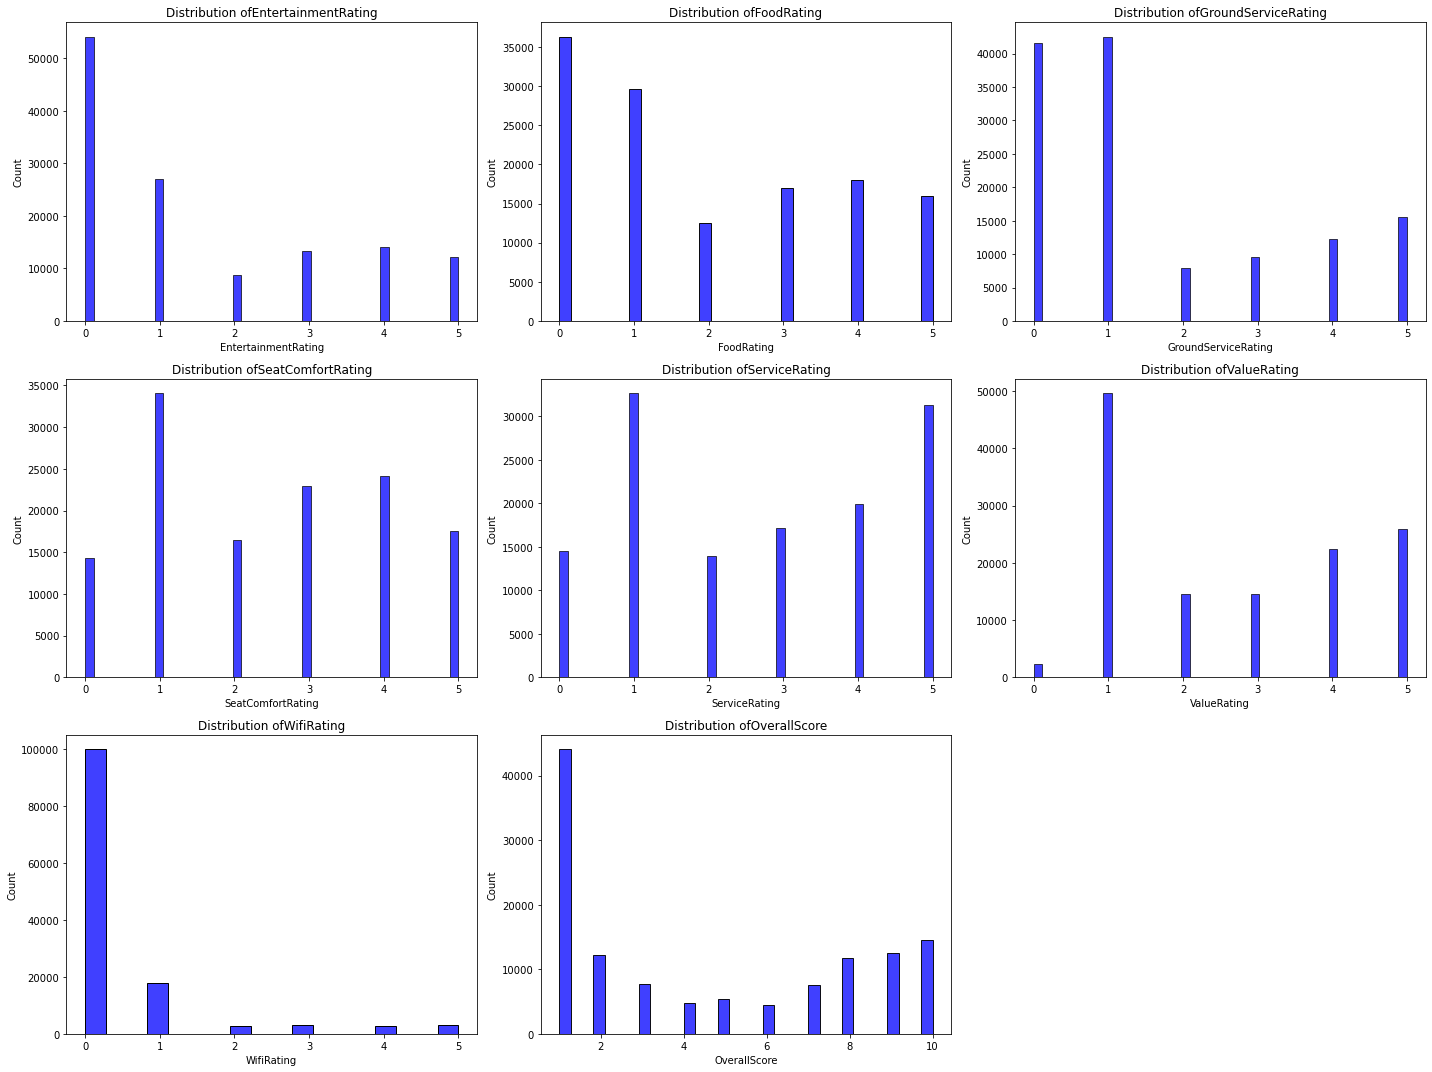

In [43]:
num_rows=3
num_cols=3
total_plots=num_rows * num_cols

fig , axes = plt.subplots(num_rows,num_cols,figsize=(20,15))

for i, column in enumerate(rating_cols):
    row=i//num_cols
    col=i%num_cols
    ax=axes[row, col]
    sns.histplot(review_df[column], ax=ax, color='blue')
    ax.set_title(f'Distribution of{column}')
    
    
if i+1<total_plots:
    for j in range(i+1,total_plots):
        row=j//num_cols
        col=j%num_cols
        fig.delaxes(axes[row,col])
        
plt.tight_layout()
plt.show()
        

In [44]:
null_scores=review_df[review_df['OverallScore'].isnull()].sample(10)
display(null_scores)

,AirlineName,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TravelType,TripVerified,ValueRating,WifiRating,MonthYearPublished
30818,Caribbean Airlines,1,1,0,NaN,no,Business class July 8th from JFK to Port of Spain. The seats were dirty with crumbs all over. When it came time for the meals no hot towels and the food was horrible and cold like some of the flight attendants. The entertainment was the worst the quality of the picture may as well have been in black and white.,1,1,NaN,0,1,0,201308
68298,Delta Air Lines,1,2,0,NaN,no,Left at the airport in Jamaica for 7.5 hours only to be told the flight was cancelled. Now at 11pm we needed to find our luggage go through the process of finding hotel reservations along with 100 other passengers. The next direct flight home to NYC was in two days. The following morning Delta tells us that our flight leaves in 40 minutes. Now we need to pack and get to the airport fast. We flew business elite and it was so disturbing to find that the armrest was broken and that no wifi or TV. Our choice of meal was eggs or cereal? Should have gone coach. The flight was not cheap and expected more. Realizing now why Delta is not our normal choice of airlines.,2,5,NaN,0,2,0,201503
103877,SunExpress,0,0,0,NaN,no,Exeter to Antalya and back September 2006. Interior of the 737 felt tired and shabby. The crew were more interested in selling duty free items than anything else and the onboard catering was probably the worst I have experienced. Delayed flights in and outbound with no explanation offered although the plane was on the ground in plenty of time at both ends. I would look at alternatives before using them again.,0,0,NaN,0,0,0,200609
42081,Ethiopian Airlines,0,0,0,NaN,no,JNB-ADD-MBA. Suddenly got an sms 5 days before that said 'your flight has been rescheduled' to the day after no further explanation or apologies. This of course affected my connecting flights plans and other bookings. After I contacted them they did offer me the chance to cancel the flight and then offered me an apology for the inconvenience caused. Also travelled with them once before from NBO-ADD-NBO. where it was a basic flight experience and other than a bumpy landing nothing to note.,0,1,NaN,0,1,0,201404
96886,SriLankan Airlines,2,2,0,NaN,no,UL882 Colombo - Bangkok Seats 59E and 59D –We've been assigned unwanted seats by their on-line check in system: (not reclinable no room for a person that is taller than 1.70m tables built into the seats arm etc.). System would not allow changes and surely didn't take in to account our next long haul flight with the same airline. We asked for this change at the counter in Rome but they had issues as well with their own portal and could not do much besides promising the transfer desk in Colombo would change our seats. Ground personnel kept on bouncing us between transfer desk and gate shifting responsibility. The Manager in charge showed up during boarding 30 minutes before take-off. Problem was not solved and when I wanted to express a formal complaint I was given a piece of paper for printers and a complaint box was indicated to me. Useless to say that I never got a reply to such paper nor to the 4 emails I sent during the following weeks.,1,2,NaN,0,1,0,201405
114,Aerosur,0,0,0,NaN,no,Zero: contact their reservation/sales desk by sending 7 emails in Spanish and English. To this day I never received any reply of any kind. Still don't have my reservation code so still unsure if my reservation exist. Have not travelled yet so can not rate on board experience.,0,0,NaN,0,1,0,201101
65364,Jetstar Airways,0,0,0,NaN,no,We booked a holiday deal to the Hayman Islands for travel between 6/9 - 9/9. We arrived at the airport on time to check-in as their mobile check-in services were down. We were advised by a very rude staff claiming the service counter closed ages ago meaning they decided to close their counter earlier. We showed him we ha

In [45]:
filtered_row=review_df[(review_df['TripVerified']==0)&(review_df['OverallScore'].isna())]
display(filtered_row)

,AirlineName,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TravelType,TripVerified,ValueRating,WifiRating,MonthYearPublished
84,Adria Airways,0,0,0,NaN,no,BRU-LJU-BRU. Outward flight on a CRJ200 very nice - comfortable excellent service and a good breakfast. Return flight on a 737 leased from Ukrainian airlines was also reasonable despite the limited legroom. Earning Star Alliance points also a plus - would recommend.,0,0,NaN,0,0,0,200710
85,Adria Airways,0,0,0,NaN,no,I often fly with Adria (50 flights per year). Since Adria is member of Star Alliance there are pretty good connections to the most destinations in Europe. The onboard service is good staff quiet nice. Home base airport in Ljubljana has been upgraded and is getting more international. The business lounge is not on the level it should be - old furniture bad food choice dark. The 3 stars that have been given to Adria are correct.,0,0,NaN,0,0,0,200708
86,Adria Airways,0,0,0,NaN,no,LGW-LJU-LGW on an older but clean A320. Outwards in 7A with plenty of legroom return in 12F with adequate legroom but need to be careful as the plastic shell on the bottom of the seat in front had started to crack with some sharp edges. Cheese roll served outbound and a jam filled croissant on the return - better than nothing but room for improvement. Coffee and soft drinks free but only one round early in the flight. Very pleasant crew on both sectors. Only gripe was baggage collection at LJU - three flights on one carousel and they seemed to unload baggage in batches from each flight turn about which caused chaos. The second carousel sat unused for the first 40 minutes waiting!,0,0,NaN,0,0,0,200707
87,Adria Airways,0,0,0,NaN,no,Frankfurt-Ljubljana-Munich in business class: the first flight was on a B737 in the colours of Ukraine International and that plane's interior was substandard while the second flight was on a new CRJ. Both flights on time and without glitch. The service is friendly but meals should be improved. Overall they gave the impression of being a pleasant short haul airline.,0,0,NaN,0,0,0,200703
88,Adria Airways,0,0,0,NaN,no,Zurich-Ljubljana return. About 2 hours+ journey. Both sector uses the Bombardier Regional Jet CRJ200. Small plane but the 2-3 crews on both sectors were friendly and the service efficient. Seats were comfortable and the planes in good clean conditions. Light meals were served - generally a roll here or a pie there plus drinks. The inflight magazine is surprisingly rich with information on Slovenian culture and way of life and is one of the best I have read. You board the planes on the tarmac via buses from the gates though and not through connecting bridges.,0,0,NaN,0,0,0,200610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129433,Wizz Air,0,0,0,NaN,no,We pre-booked a transfer through Wizz Air for when we flew Luton - Cluj. We waited an hour for our taxi and decided to phone to ask where it was only to be told that they had picked someone else up and no they weren't going to send anyone out to get us no they weren't going to refun the money and that in fact it was all our fault! We had to pay for another taxi to take us to our hotel which was half the cost we had already paid through Wizz Air. I tried to claim the money back from Wizz Air I have written 2 emails and 6 weeks later I am still awaiting a response. Think twice before using!!,0,0,NaN,0,1,0,201012
129436,Wizz Air,0,0,0,NaN,no,Luton-Prague-Luton. Poor service rude cabin crew refused to collect rubbish. Flight Deck Crew spent more time in passenger compartment chatting up cabin staff than flight duties. Ripped seats drunken football fans not dealt with at all. Priority boarding at Prague end ignored by ground staff. Toilets dirty.,0,0,NaN,0,1,0,201011
129437,Wizz Air,0,0,0,NaN,no,Budapest to London with A320 almost 7 hrs delayed. They said due to weather conditions but it wasn't true. We were told at the check-in

In [46]:
# Count the number of occurrences where trip is not verified and the overall score is null
count = filtered_row.shape[0]

# Print the count
print("Number of occurrences:", count)

# Print the total null values in OverallScore
print("Number of nulls in OverallScore:", review_df['OverallScore'].isna().sum())

Number of occurrences: 4331
Number of nulls in OverallScore: 4331


In [47]:
review_df=review_df.dropna(subset=['OverallScore'])

In [48]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125124 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          125124 non-null  object 
 1   EntertainmentRating  125124 non-null  int64  
 2   FoodRating           125124 non-null  int64  
 3   GroundServiceRating  125124 non-null  int64  
 4   OverallScore         125124 non-null  float64
 5   Recommended          125124 non-null  object 
 6   Review               124301 non-null  object 
 7   SeatComfortRating    125124 non-null  int64  
 8   ServiceRating        125124 non-null  int64  
 9   TravelType           91145 non-null   object 
 10  TripVerified         125124 non-null  int64  
 11  ValueRating          125124 non-null  int64  
 12  WifiRating           125124 non-null  int64  
 13  MonthYearPublished   125124 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 14.3+ MB


In [49]:
#check for its binary value
review_df['Recommended'].value_counts()

no     73332
yes    51792
Name: Recommended, dtype: int64

In [50]:
review_df['Recommended']=review_df['Recommended'].replace({'no': 0,'yes': 1})

In [51]:
(review_df['Recommended'].value_counts())/len(review_df)*100

0    58.607461
1    41.392539
Name: Recommended, dtype: float64

In [52]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125124 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          125124 non-null  object 
 1   EntertainmentRating  125124 non-null  int64  
 2   FoodRating           125124 non-null  int64  
 3   GroundServiceRating  125124 non-null  int64  
 4   OverallScore         125124 non-null  float64
 5   Recommended          125124 non-null  int64  
 6   Review               124301 non-null  object 
 7   SeatComfortRating    125124 non-null  int64  
 8   ServiceRating        125124 non-null  int64  
 9   TravelType           91145 non-null   object 
 10  TripVerified         125124 non-null  int64  
 11  ValueRating          125124 non-null  int64  
 12  WifiRating           125124 non-null  int64  
 13  MonthYearPublished   125124 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 14.3+ MB


In [53]:
null_reviews=review_df[review_df['Review'].isnull()]

first5_null_review=null_reviews.head(10)
display(first5_null_review)

,AirlineName,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TravelType,TripVerified,ValueRating,WifiRating,MonthYearPublished
219,Aerolineas Argentinas,4,3,4,6.0,1,NaN,3,4,Business,0,4,0,201702
631,Aeroflot Russian Airlines,0,4,4,9.0,1,NaN,4,5,Solo Leisure,1,3,0,201912
744,Aeromexico,1,1,4,2.0,0,NaN,3,1,Family Leisure,0,3,1,202301
979,Aeromexico,0,0,0,1.0,0,NaN,0,0,Couple Leisure,1,1,0,202208
1946,Air China,0,0,1,1.0,0,NaN,1,1,Solo Leisure,0,1,0,201907
2077,Aeroflot Russian Airlines,5,5,5,10.0,1,NaN,5,5,Solo Leisure,0,5,0,201703
2481,Air Canada rouge,5,5,5,10.0,1,NaN,5,5,Couple Leisure,0,5,5,201907
2850,Air China,4,4,4,4.0,0,NaN,3,4,Business,0,3,0,201806
2866,Aeromexico,2,2,1,1.0,0,NaN,2,2,Couple Leisure,0,1,1,201711
2944,Aer Lingus,0,0,1,1.0,0,NaN,3,1,Solo Leisure,0,4,0,201805


In [54]:
review_df=review_df.dropna(subset=['Review'])

In [55]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124301 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          124301 non-null  object 
 1   EntertainmentRating  124301 non-null  int64  
 2   FoodRating           124301 non-null  int64  
 3   GroundServiceRating  124301 non-null  int64  
 4   OverallScore         124301 non-null  float64
 5   Recommended          124301 non-null  int64  
 6   Review               124301 non-null  object 
 7   SeatComfortRating    124301 non-null  int64  
 8   ServiceRating        124301 non-null  int64  
 9   TravelType           90322 non-null   object 
 10  TripVerified         124301 non-null  int64  
 11  ValueRating          124301 non-null  int64  
 12  WifiRating           124301 non-null  int64  
 13  MonthYearPublished   124301 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 14.2+ MB


In [56]:
review_df.shape

(124301, 14)

EDA - EXPLORATORY DATA ANALYSIS

In [57]:
review_df['AirlineName'].nunique()

547

In [58]:
airline_counts=review_df['AirlineName'].value_counts()

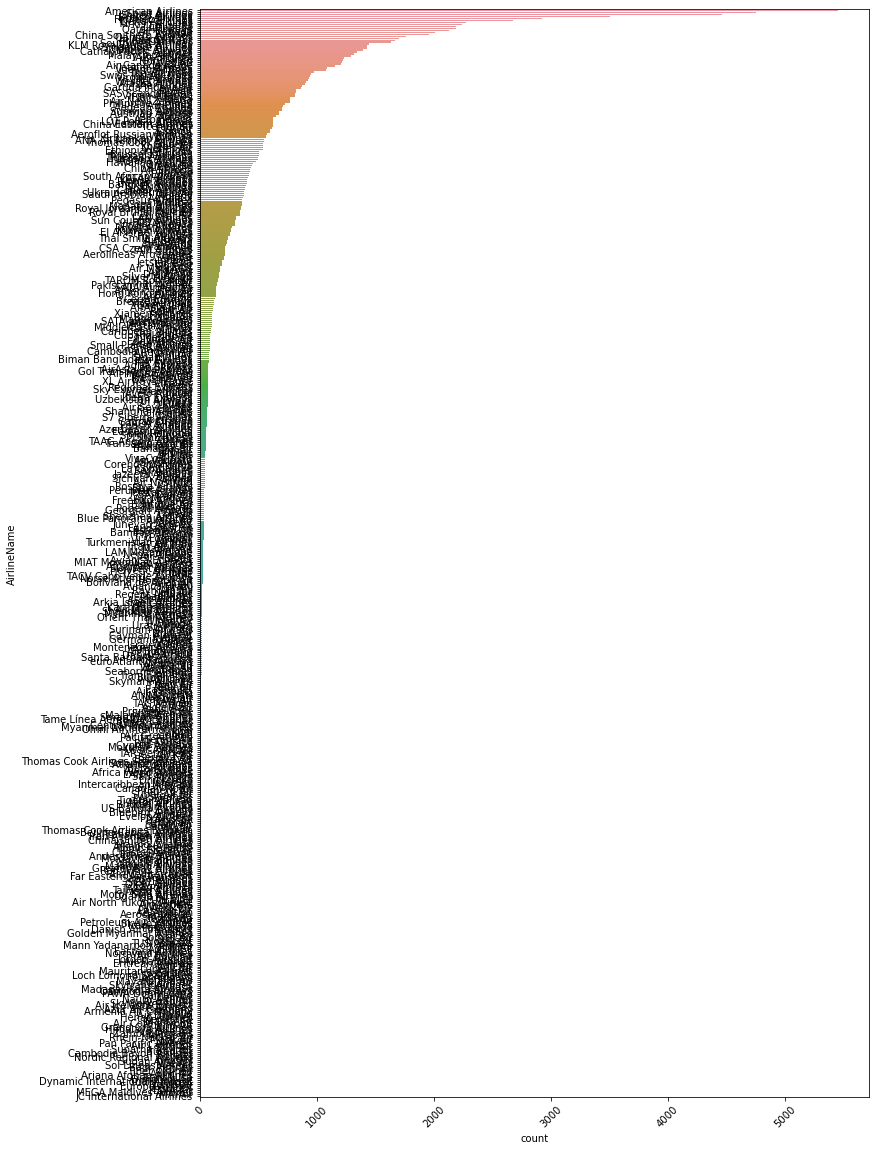

In [59]:
plt.figure(figsize=(12,20))
sns.countplot(y='AirlineName', data=review_df,order=airline_counts.index)

plt.xticks(rotation=45)
plt.show()

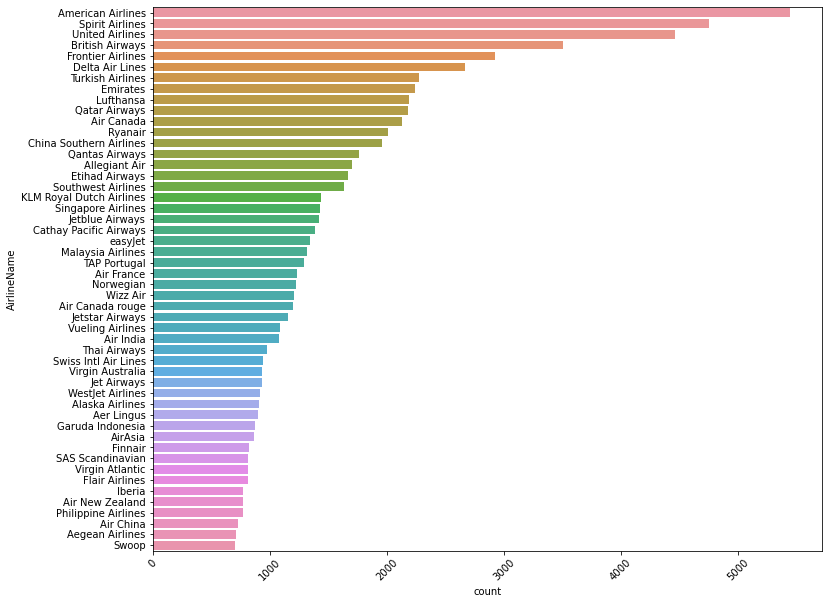

In [60]:
top50_airline=airline_counts[:50].index

plt.figure(figsize=(12,10))
sns.countplot(y='AirlineName', data=review_df, order=top50_airline)

plt.xticks(rotation=45)
plt.show()

In [61]:
unique_airlines=airline_counts[airline_counts==1].shape[0]

print(unique_airlines)

41


In [62]:
minor_airlines=airline_counts[airline_counts<10].shape[0]
print(minor_airlines)

176


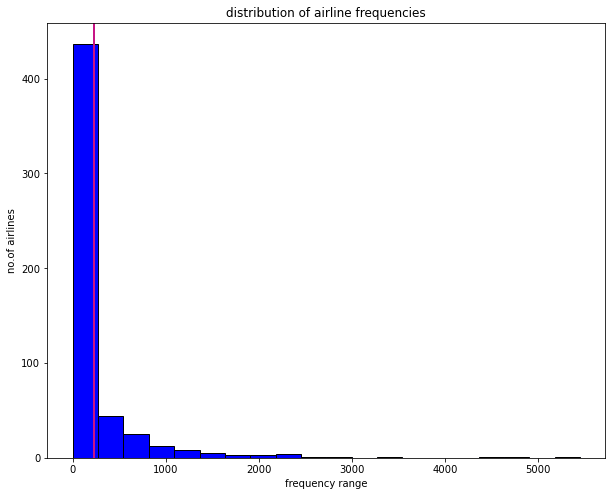

In [63]:
airline_counts=review_df['AirlineName'].value_counts()

#define no.of bis as 20 for histogram
num_bins=20
plt.figure(figsize=(10,8))
plt.hist(airline_counts, bins=num_bins, color='blue', edgecolor='black')

plt.xlabel('frequency range')
plt.ylabel('no.of airlines')
plt.title('distribution of airline frequencies')

mean=np.mean(airline_counts)
plt.axvline(x=mean, color='mediumvioletred', linestyle='-', linewidth=2)
plt.show()

In [64]:
#correlation heatmap 
corr=review_df.corr()
corr

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,MonthYearPublished
EntertainmentRating,1.000000,0.635310,0.213937,0.436722,0.389486,0.532326,0.491583,-0.115339,0.437151,0.311686,-0.123956
FoodRating,0.635310,1.000000,0.337742,0.637879,0.584638,0.697528,0.720354,-0.138911,0.630356,0.194454,-0.163640
GroundServiceRating,0.213937,0.337742,1.000000,0.405565,0.373329,0.445983,0.454991,0.200874,0.404857,0.294731,0.327761
OverallScore,0.436722,0.637879,0.405565,1.000000,0.904851,0.675906,0.685938,-0.219837,0.883895,0.074535,-0.335330
Recommended,0.389486,0.584638,0.373329,0.904851,1.000000,0.617767,0.634232,-0.198055,0.840591,0.054987,-0.296958
SeatComfortRating,0.532326,0.697528,0.445983,0.675906,0.617767,1.000000,0.792448,-0.096287,0.690242,0.159063,-0.088162
ServiceRating,0.491583,0.720354,0.454991,0.685938,0.634232,0.792448,1.000000,-0.096755,0.683699,0.143341,-0.080453
TripVerified,-0.115339,-0.138911,0.200874,-0.219837,-0.198055,-0.096287,-0.096755,1.000000,-0.197814,0.141849,0.612199
ValueRating,0.437151,0.630356,0.404857,0.883895,0.840591,0.690242,0.683699,-0.197814,1.000000,0.076979,-0.280052
WifiRating,0.311686,0.194454,0.294731,0.074535,0.054987,0.159063,0.143341,0.141849,0.076979,1.000000,0.225815


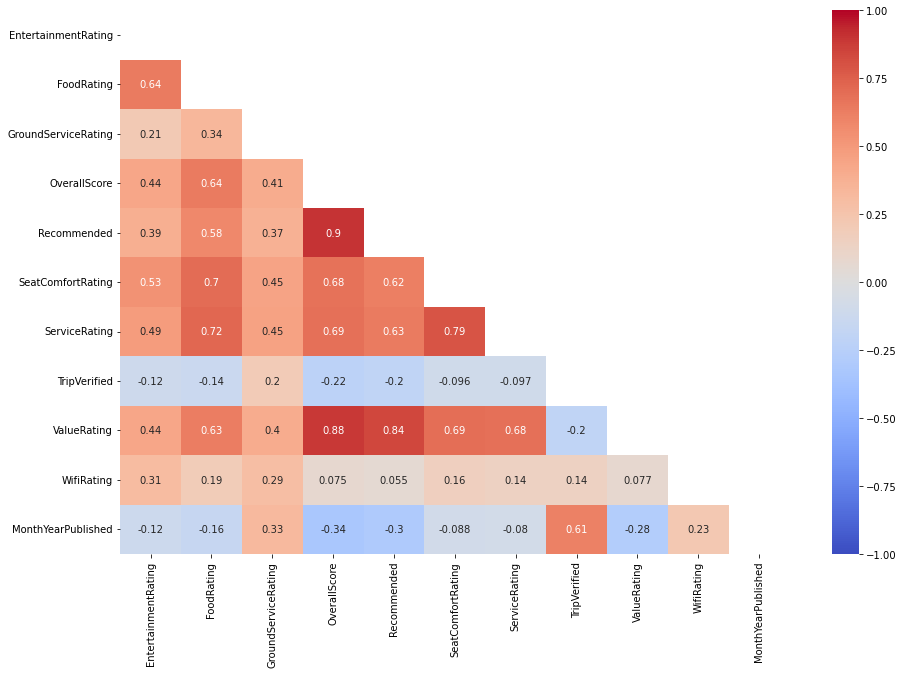

In [65]:
mask=np.triu(np.ones_like(review_df.corr(),dtype=bool))

plt.figure(figsize=(15,10))
sns.heatmap(corr,mask=mask,cmap='coolwarm',center=0, vmin=-1,vmax=1,annot=True)
plt.show()

In [66]:
proportions=review_df.groupby('AirlineName')['Recommended'].mean()

normalized_proportion=(proportions-proportions.min())/(proportions.max()-proportions.min())

sort_proportions=normalized_proportion.sort_values(ascending=False)



Text Vectorization


In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
vectorizer=CountVectorizer()

review_vectors=vectorizer.fit_transform(review_df['Review'])

review_vectors_df=pd.DataFrame.sparse.from_spmatrix(review_vectors, columns=vectorizer.get_feature_names())

print(review_vectors_df.head())

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   00  000  0000  0001  0002  0003  0004  0005  0005am  0005h  ...  \
0   0    0     0     0     0     0     0     0       0      0  ...   
1   0    0     0     0     0     0     0     0       0      0  ...   
2   0    0     0     0     0     0     0     0       0      0  ...   
3   0    0     0     0     0     0     0     0       0      0  ...   
4   0    0     0     0     0     0     0     0       0      0  ...   

   还有丝绒蛋糕還有各種水果  還放著過年的歌  需要的東西也能及時送到  非常感谢  飛機一路起降也很穩  飞行途中  \
0             0        0            0     0          0     0   
1             0        0            0     0          0     0   
2             0        0            0     0          0     0   
3             0        0            0     0          0     0   
4             0        0            0     0          0     0   

   验票的姐姐说后期再给我提供更多的新消息并且也叫我落地后给她报声平安  ﬁnd  ﬂight  ﬂying  
0                                  0    0      0      0  
1                                  0    0      0      0  
2                   

In [69]:
#create a token pattern for english words , ignore other characters
vectorizer=CountVectorizer(token_pattern=r'\b[A-Za-z]+\b')

review_vectors=vectorizer.fit_transform(review_df['Review'])

review_vectors_df=pd.DataFrame.sparse.from_spmatrix(review_vectors, columns=vectorizer.get_feature_names_out())
print(review_vectors_df.head())

   a  aa  aaa  aaaa  aaaaahhhh  aaadvantage  aabay  aaccess  aadhar  \
0  3   0    0     0          0            0      0        0       0   
1  3   0    0     0          0            0      0        0       0   
2  3   0    0     0          0            0      0        0       0   
3  2   0    0     0          0            0      0        0       0   
4  1   0    0     0          0            0      0        0       0   

   aadmirals  ...  zweimal  zx  zya  zyl  zytl  zz  zzurich  zzz  zzza  zzzz  
0          0  ...        0   0    0    0     0   0        0    0     0     0  
1          0  ...        0   0    0    0     0   0        0    0     0     0  
2          0  ...        0   0    0    0     0   0        0    0     0     0  
3          0  ...        0   0    0    0     0   0        0    0     0     0  
4          0  ...        0   0    0    0     0   0        0    0     0     0  

[5 rows x 53834 columns]


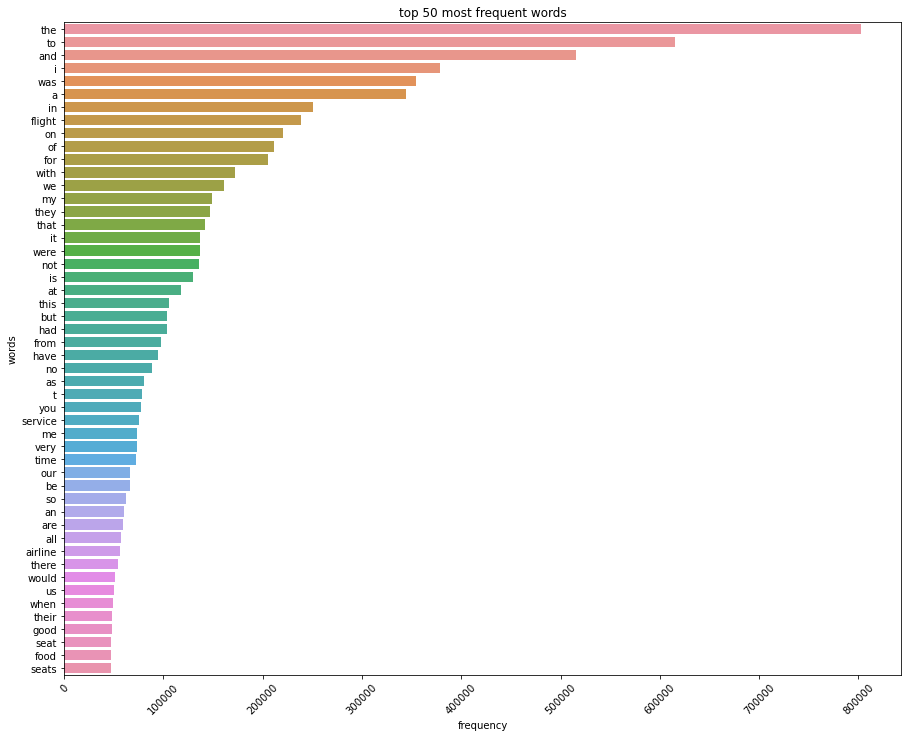

In [70]:
#Compute the word frequencies
word_frequency=review_vectors_df.sum(axis=0)

sorted_word_frequency=word_frequency.sort_values(ascending=False)
top50_word=sorted_word_frequency.head(50)

plt.figure(figsize=(15,12))
sns.barplot(x=top50_word.values,y=top50_word.index)
plt.title('top 50 most frequent words')
plt.xlabel('frequency')
plt.ylabel('words')
plt.xticks(rotation=45)
plt.show()

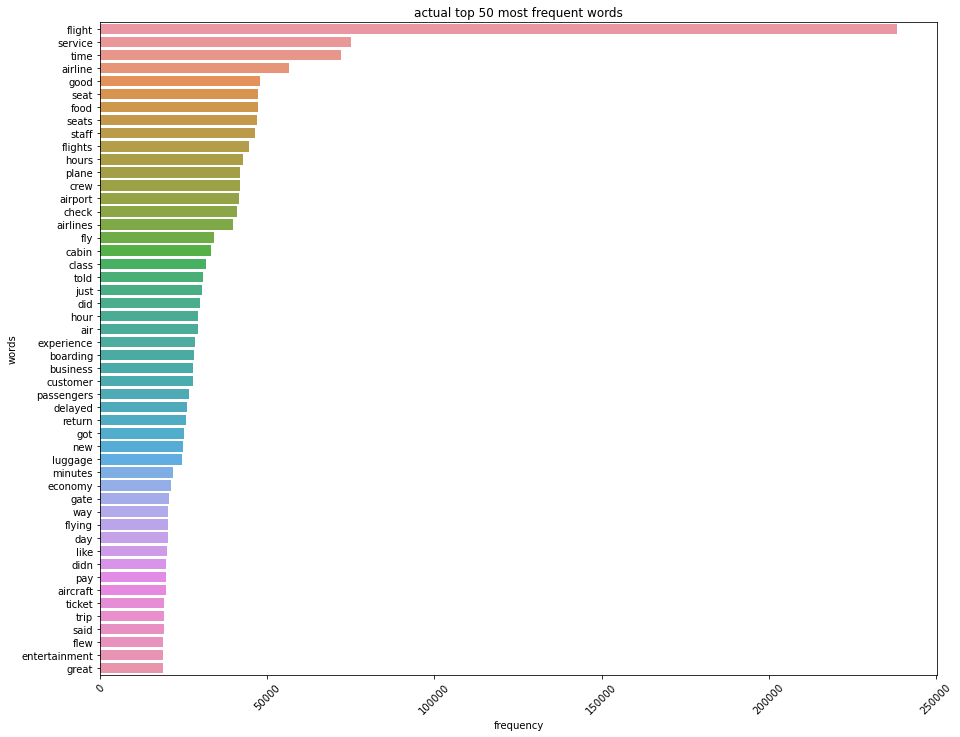

In [71]:
#many top words are stopwords so we need to exclude them 
from sklearn.feature_extraction import text
stopwords=list(text.ENGLISH_STOP_WORDS)
vectorizer=CountVectorizer(stop_words=stopwords)

reviews_vectors=vectorizer.fit_transform(review_df['Review'])

reviews_vectors_df=pd.DataFrame.sparse.from_spmatrix(reviews_vectors, columns=vectorizer.get_feature_names_out())

words_frequency=reviews_vectors_df.sum(axis=0)
sort_words_frequency=words_frequency.sort_values(ascending=False)

top50_word=sort_words_frequency.head(50)

plt.figure(figsize=(15,12))
sns.barplot(x=top50_word.values, y=top50_word.index)
plt.title('actual top 50 most frequent words')
plt.xlabel('frequency')
plt.ylabel('words')
plt.xticks(rotation=45)
plt.show()

In [72]:
#among these top 50 words , we see that only 'good' and 'great' carry +ve sentiment 
# alot of other words are neutral sentiments 
# also their sentiment depends on the context of the review

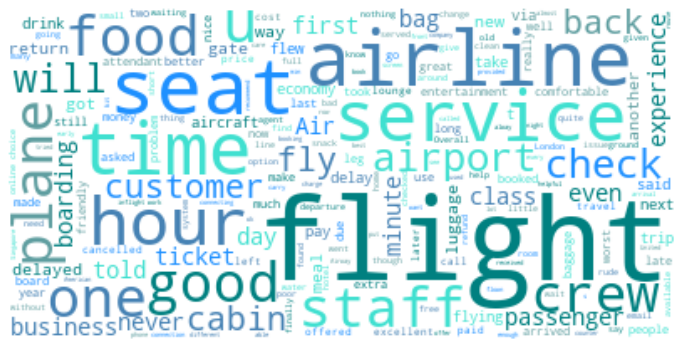

In [74]:
from wordcloud import WordCloud
from PIL import Image

review_text=' '.join(review_df['Review'].astype(str))
wordcloud = WordCloud(contour_color='steelblue', background_color='white', collocations=False).generate(review_text)

colors=["steelblue","dodgerblue","turquoise","cadetblue","teal"]

# Generate the wordcloud with custom colors
wordcloud = wordcloud.recolor(color_func=lambda *args, **kwargs: colors[np.random.randint(0, len(colors))])

# Plot the wordcloud with the airplane shape and custom colors
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



Model Building 

In [75]:
review_df.head(10)

,AirlineName,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TravelType,TripVerified,ValueRating,WifiRating,MonthYearPublished
0,AB Aviation,0,4,4,9.0,1,"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time.",4,5,Solo Leisure,1,3,0,201911
1,AB Aviation,0,1,1,1.0,0,"Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros.",2,2,Solo Leisure,1,2,0,201906
2,AB Aviation,0,1,1,1.0,0,"Anjouan to Dzaoudzi. A very small airline and the only airline based in Comoros. Check-in was disorganised because of locals with big packages and disinterested staff. The flight was fortunately short (30 mins). Took off on time and landed on time. With a short flight like there was of course no in-flight entertainment nor cabin service except for biscuits and a bottle of water, which was quite nice!",2,1,Solo Leisure,1,2,0,201906
3,Aerocaribbean,0,0,0,8.0,1,Havana - Cayo Coco return. A one hour flight with an old ATR42 turboprop. Seats surprisingly comfortable and we were offered a free drink plus candy onboard. Nothing special but we arrived on time.,0,0,NaN,0,4,0,201012
4,Aerocaribbean,0,0,0,1.0,0,Holguin to Havana last week. Okay apart from issuing duplicate boarding cards to different passengers. Return was in a turbo prop plane which was 1 hour late and was infested by cockroaches running along the floor overhead lockers and electrical ducts. The plane was generally dirty. Obvious lack of maintenance.,0,0,NaN,0,0,0,201011
5,Aerocaribbean,0,0,0,1.0,0,What a wonderful friendly airline. Flew with them Hholguin to Havana and back. Both flights only minor delays was served juice and a cake on this short internal flight safety demonstration was done.,0,0,NaN,0,0,0,200804
6,AeroItalia,0,1,1,2.0,0,Only 1 check-in desk open for a full plane and impossible to check in online. Amazingly bad! Flight crew is friendly. Pilot flying into Milano on April 1st did a very bad landing.,1,3,Business,1,1,0,202304
7,Aero VIP,0,0,5,9.0,1,"Cascais to Bragança with Aero VIP. Services are provided by SevenAir. The site is easy. I had a couple of questions and the support was fantastic. The plane was just fine, despite being a propeller, thus a bit noisy.",4,4,Solo Leisure,1,4,0,201905
8,Aero VIP,0,0,5,9.0,1,"Bragança to Cascais with Aero VIP. Seven Air provides the services. The pilot was very nice and made sure everyone was comfortable and explained there would be some turbulence, which was normal. Flight arrived 5 minutes late.",4,5,Solo Leisure,1,4,0,201905
9,Aero VIP,0,0,3,8.0,1,"Funchal to Porto Santo. This 10-minutes flight is a true experience. Aero Vip carries out the public service obligation connection between Funchal and the smaller Porto Santo airport located on the island with the same name. The outbound flight was on a vintage (1989) Jetstream 32 turboprop airliner with the return flight being on a slightly older (1987) Jetstream 31. In both cases the safety briefing was carried out by the first officer himself, as the plane does not have any FA on board. The outbound flight left rig

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
from sklearn.linear_model import LogisticRegression

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [103]:
X=review_df.drop('OverallScore',axis=1)
Y=review_df['OverallScore'].apply(lambda y_value:1 if y_value >=7.0 else 0)



In [104]:
print(X)

          AirlineName  EntertainmentRating  FoodRating  GroundServiceRating  \
0         AB Aviation                    0           4                    4   
1         AB Aviation                    0           1                    1   
2         AB Aviation                    0           1                    1   
3       Aerocaribbean                    0           0                    0   
4       Aerocaribbean                    0           0                    0   
...               ...                  ...         ...                  ...   
129448       Wizz Air                    0           0                    0   
129449       Wizz Air                    0           0                    0   
129451       Wizz Air                    0           0                    0   
129453       Wizz Air                    0           0                    0   
129454       Wizz Air                    0           0                    0   

        Recommended  \
0                 1   
1    

In [105]:
print(Y)

0         1
1         0
2         0
3         1
4         0
         ..
129448    1
129449    1
129451    1
129453    0
129454    0
Name: OverallScore, Length: 124301, dtype: int64


In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [112]:
X_train.shape,Y_train.shape

((99440, 13), (99440,))

In [113]:
X_test.shape,Y_test.shape

((24861, 13), (24861,))

In [114]:
vectorizer=TfidfVectorizer()
X_train_vect=vectorizer.fit_transform(X_train['Review'])
X_test_vect=vectorizer.transform(X_test['Review'])

In [119]:
logistic_reg=LogisticRegression(solver='liblinear')

In [120]:
logistic_reg.fit(X_train_vect,Y_train)

LogisticRegression(solver='liblinear')

In [129]:

Y_pred=logistic_reg.predict(X_test_vect)

In [130]:
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.925143799525361


In [133]:
report=classification_report(Y_test,Y_pred)
print("Classification Report: \n" ,report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     15586
           1       0.91      0.89      0.90      9275

    accuracy                           0.93     24861
   macro avg       0.92      0.92      0.92     24861
weighted avg       0.92      0.93      0.92     24861



In [134]:
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print("Confusion matrix:\n", confusion_matrix)

Confusion matrix:
 [[14747   839]
 [ 1022  8253]]
